This notebook shows how to classify flowers via a simple nearest neighbors model.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Let us load the Iris dataset (https://archive.ics.uci.edu/ml/datasets/iris). 

In [2]:
# load data
X = np.loadtxt('iris.data', delimiter=',', usecols=[0,1,2,3], dtype=float)
y = np.loadtxt('iris.data', delimiter=',', usecols=[4], dtype=str)

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# convert labels
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int32)

In [3]:
# for visualization purposes: only take the first two features
X = X[:, [0,1]]

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

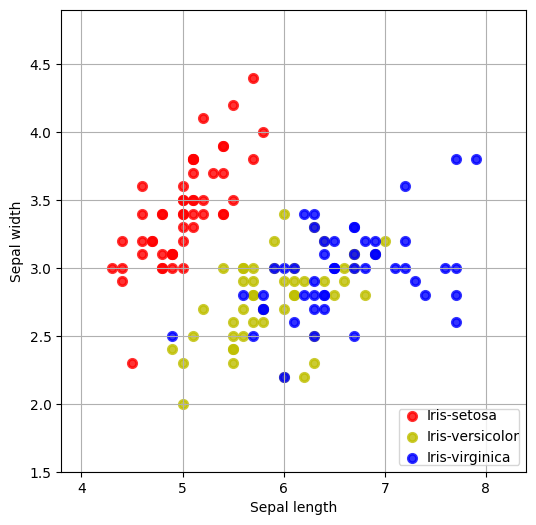

In [5]:
colors = "ryb"
lw = 2

plt.figure(figsize=(6,6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.savefig("iris.svg")

Let us fit a nearest neighbors model using the popular Scikit-Learn library!

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# train the model (also called "fitting")
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# make prediction
prediction = model.predict([X[0]])

Next, let us visualize the final classification surface/boundaries. Since we are only considering two features, we can generate a two-dimensional plot.

/tmp/ipykernel_10427/3498424680.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],


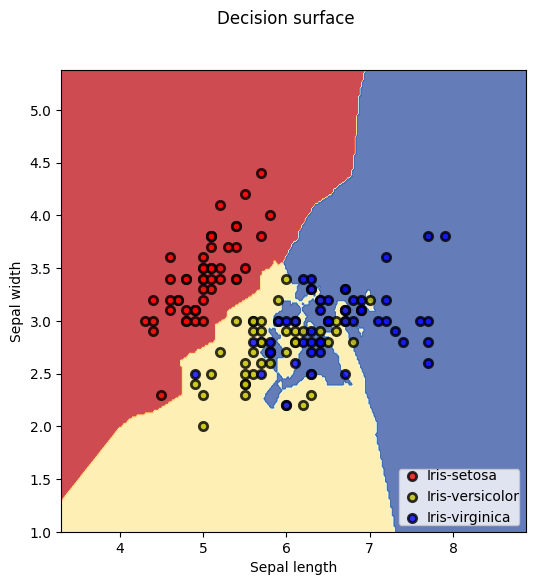

In [8]:
plot_step = 0.02
n_classes = 3
colors = "ryb"
plt.figure(figsize=(6,6))


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=.8, cmap=plt.cm.RdYlBu)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Plot the training points
for i, color in zip(range(n_classes), colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', alpha=.8, lw=lw)
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()    